In [5]:
from sklearn.datasets import fetch_openml
from sklearn.cluster import MeanShift
from sklearn.metrics import pairwise_distances_argmin, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset and take the first 2000 images
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

# Convert labels from strings to integers
y = y.astype(int)

# Optionally, reduce the dataset for faster processing (e.g., first 2000 samples)
X, y = X[:2000], y[:2000]

# Verify the dataset
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
print(f"Unique labels in y: {np.unique(y)}")


Shape of X: (2000, 784)
Shape of y: (2000,)
Unique labels in y: [0 1 2 3 4 5 6 7 8 9]


Images for digit 0: 191
Images for digit 1: 220
Images for digit 2: 198
Images for digit 3: 191
Images for digit 4: 214
Images for digit 5: 180
Images for digit 6: 200
Images for digit 7: 224
Images for digit 8: 172
Images for digit 9: 210


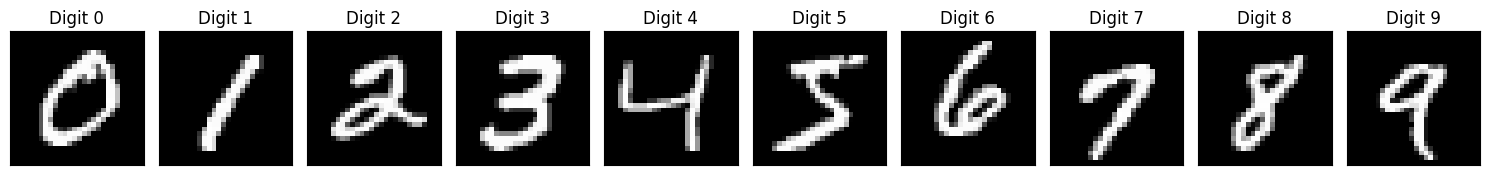

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Reshape data
n_images = X.shape[0]
X_images = X.reshape(n_images, 28, 28)
X = X_images.reshape(n_images, 28 * 28)

# Verify number of images for each digit
n_digits = 10
for i in range(n_digits):
    digit_i_idx = np.where(y == i)[0]
    print(f"Images for digit {i}: {len(digit_i_idx)}")

# Display images for each digit
fig, axes = plt.subplots(1, n_digits, figsize=(15, 5))

for i in range(n_digits):
    digit_i_idx = np.where(y == i)[0]

    if len(digit_i_idx) == 0:
        print(f"No images found for digit {i}")
        axes[i].set_visible(False)  # Hide the axis for this digit
        continue

    digit_images = X_images[digit_i_idx]
    image = digit_images[0]  # Get an example image for this digit

    axes[i].imshow(image, cmap='gray')
    axes[i].set_yticks([])
    axes[i].set_xticks([])
    axes[i].set_title(f"Digit {i}")

plt.tight_layout()
plt.show()


In [23]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.datasets import fetch_openml
from torchvision import models, transforms
import torch
from PIL import Image

# Load MNIST dataset (first 2000 samples)
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
y = y.astype(int)
X, y = X[:2000], y[:2000]  # Reduce dataset size for efficiency

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# Normalize the feature data
X_normalized = StandardScaler().fit_transform(X)

# Apply Mean Shift with bandwidth 100
bandwidth = 100
mean_shift = MeanShift(bandwidth=bandwidth)
cluster_labels = mean_shift.fit_predict(X_normalized)

# Output clustering results
num_clusters = len(np.unique(cluster_labels))
print(f"Number of clusters found: {num_clusters}")

# Debugging: Cluster distribution
unique, counts = np.unique(cluster_labels, return_counts=True)
print("Cluster distribution:", dict(zip(unique, counts)))


Shape of X: (2000, 784)
Shape of y: (2000,)
Number of clusters found: 3
Cluster distribution: {0: 1998, 1: 1, 2: 1}


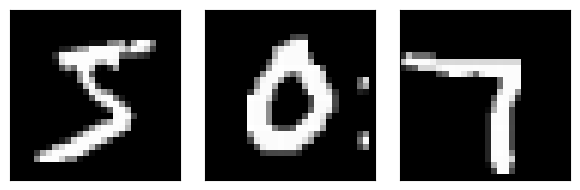

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the number of clusters
n_clusters = len(np.unique(cluster_labels))

# Create subplots
fig, axes = plt.subplots(1, n_clusters, figsize=(n_clusters*2, 2))

# Loop through each cluster and plot some images from that cluster
for c_i in range(n_clusters):
    # Get indices of points belonging to the current cluster
    cluster_indices = np.where(cluster_labels == c_i)[0]

    # Plot the first image in the current cluster (or a few random ones)
    # You can also plot a few random images from the cluster if you prefer
    sample_image = X[cluster_indices[0]].reshape(28, 28)  # Reshaping to 28x28 for MNIST

    axes[c_i].imshow(sample_image, cmap='gray')

    # Styling: Turn off x/y ticks for all subplots
    axes[c_i].set_xticks([])
    axes[c_i].set_yticks([])

# Adjust layout to make sure there's no overlap
plt.tight_layout()
plt.show()


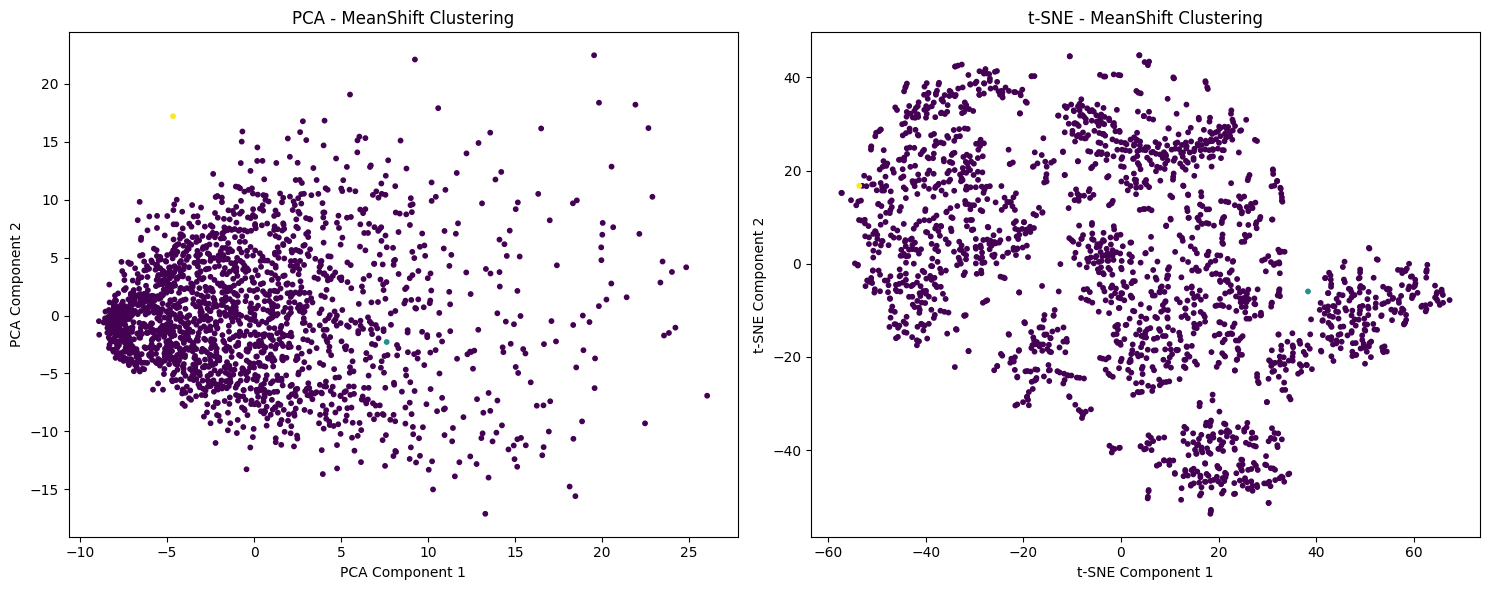

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load MNIST dataset (first 2000 samples)
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
y = y.astype(int)
X, y = X[:2000], y[:2000]  # Reduce dataset size for efficiency

# Standardize the data for MeanShift
X_normalized = StandardScaler().fit_transform(X)

# Apply MeanShift clustering with bandwidth 100
bandwidth = 100
mean_shift = MeanShift(bandwidth=bandwidth)
cluster_labels = mean_shift.fit_predict(X_normalized)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_normalized)

# Create subplots for PCA and t-SNE
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot PCA results
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=10)
axes[0].set_title('PCA - MeanShift Clustering')
axes[0].set_xlabel('PCA Component 1')
axes[0].set_ylabel('PCA Component 2')

# Plot t-SNE results
axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='viridis', s=10)
axes[1].set_title('t-SNE - MeanShift Clustering')
axes[1].set_xlabel('t-SNE Component 1')
axes[1].set_ylabel('t-SNE Component 2')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


There are total 3 cluster is forming after applying mean shift